## Visualization of a 2d Gaussian density as a surface and contour plots 

In [1]:
import jax
import jax.numpy as jnp
import jax.scipy
from jax.config import config
from jax.scipy.stats import multivariate_normal
from matplotlib import colors
from matplotlib.colors import LightSource
from mpl_toolkits.mplot3d import axes3d
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt

%matplotlib inline
config.update("jax_enable_x64", True)


try:
    from probml_utils import savefig, latexify
except ModuleNotFoundError:
    %pip install -qq git+https://github.com/probml/probml-utils.git
    from probml_utils import savefig, latexify

In [2]:
#### finding multivariate pdf ####

gaussians = ["Full", "Diagonal", "Spherical"]

# Mean and Covaraince
mean = jnp.array([0, 0])
covariance = {
    "Full": jnp.array([[2, 1.8], [1.8, 2]]),
    "Diagonal": jnp.array([[1, 0], [0, 3]]),
    "Spherical": jnp.array([[1, 0], [0, 1]]),
}

# Multivariate gaussian PDF


def gaussian_pdf(x, y, G):
    return multivariate_normal.pdf(jnp.array([x, y]), mean=mean, cov=covariance[G])


# Defining Meshgrid
start_point = 5
stop_point = 5
num_samples = 100
points = jnp.linspace(-start_point, stop_point, num_samples)
X, Y = jnp.meshgrid(points, points)

/home/patel_karm/probml-utils/probml_utils/plotting.py:26: UserWarning: LATEXIFY environment variable not set, not latexifying
  warnings.warn("LATEXIFY environment variable not set, not latexifying")


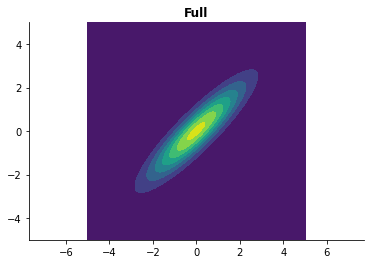

/home/patel_karm/probml-utils/probml_utils/plotting.py:80: UserWarning: set FIG_DIR environment variable to save figures
  warnings.warn("set FIG_DIR environment variable to save figures")


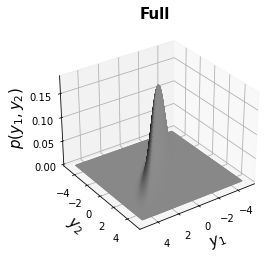

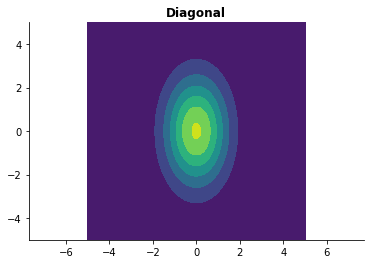

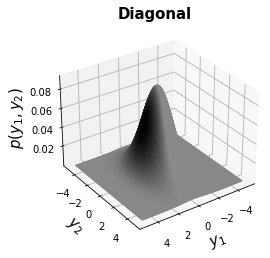

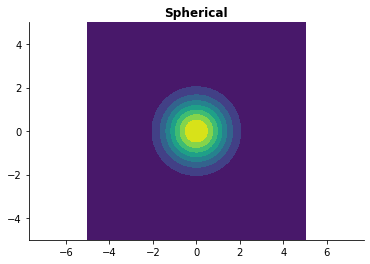

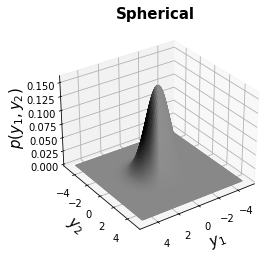

In [13]:
##### Plots to show probability distribution #####

# contour plot
def make_contour_plot(gauss, fig=None, ax=None, xlabel=None):
    # vectorizing
    Z = jax.vmap(jax.vmap(gaussian_pdf, (0, 0, None)), (1, 1, None))(X, Y, gauss)

    if fig is None:
        fig, ax = plt.subplots()

    ax.contourf(Y, X, Z)
    ax.set_xlabel(xlabel)
    # ax.set_ylabel("$y_2$")
    plt.axis("equal")
    sns.despine()
    plt.title(gauss, fontweight="bold")
    plt.draw()
    # savefig("gaussPlot2dDemoContour{}".format(gauss))
    plt.show()


# Surface plot


def make_surface_plot(gauss, fig=None, ax=None):
    # vectorizing
    Z = jax.vmap(jax.vmap(gaussian_pdf, (0, 0, None)), (1, 1, None))(X, Y, gauss)

    if fig is None:
        fig = plt.figure()
        ax = fig.add_subplot(111, projection="3d")

    ls = LightSource(azdeg=30, altdeg=55)
    cmap_color = ls.shade(np.array(Z), cmap=plt.cm.gray, blend_mode="hsv", norm=colors.PowerNorm(0))
    ax.plot_surface(Y, X, Z, antialiased=True, facecolors=cmap_color, rcount=200, ccount=200)
    ax.set_aspect("auto")
    sns.despine()
    ax.view_init(elev=30, azim=55)
    ax.set_xlabel("$y_1$", fontsize=15)
    ax.set_ylabel("$y_2$", fontsize=15)
    ax.zaxis.set_rotate_label(False)
    ax.set_zlabel("$p(y_1, y_2)$", rotation=90, labelpad=6, fontsize=15)
    plt.title(gauss, fontweight="bold", fontsize=15)
    plt.draw()
    savefig("gaussPlot2dDemoSurf{}".format(gauss))
    plt.show()


# plotting for different gaussians
for gauss in gaussians:
    latexify(width_scale_factor=3, fig_height=1.5)
    make_contour_plot(gauss, fig=None, ax=None)
    latexify(width_scale_factor=1.5, fig_height=3)
    make_surface_plot(gauss, fig=None, ax=None)

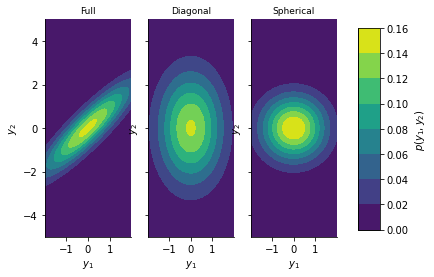

In [10]:
# Plotting contour subplots for colorbars for fig 3.6
latexify(width_scale_factor=1, fig_height=1.5)
fig, axes = plt.subplots(nrows=1, ncols=3, sharey=True)
ind = 0
labs = ["(a)", "(b)", "(c)"]
for i, ax in enumerate(axes.flat):
    gauss = gaussians[ind]
    ind += 1
    Z = jax.vmap(jax.vmap(gaussian_pdf, (0, 0, None)), (1, 1, None))(X, Y, gauss)
    im = ax.contourf(Y, X, Z)
    ax.set_aspect("equal")
    ax.axis("equal")
    ax.set_xlabel(labs[i])
    # ax.set_ylabel("$y_2$")
    ax.set_title(gauss, fontsize=9)

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
cbar = fig.colorbar(im, cax=cbar_ax)
cbar.set_label("$p(y_1, y_2)$")
sns.despine()
plt.draw()
savefig("gaussPlot2dDemoContour", tight_layout=False, tight_bbox=True)
plt.show()